## ML - Telemétricas

In [1]:
df = spark.sql("SELECT * FROM Telemetricas_CLEAN.dt_result LIMIT 1000")
display(df)

StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 3, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 1c2c9b7f-fff5-48dd-8d43-323973c593a7)

# Import Libraries

In [2]:
# import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 4, Finished, Available, Finished)

# 0. Carregando os dados

In [3]:
df = spark.read.table("dt_sondas_clean_completa")
df.show(5)

StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 5, Finished, Available, Finished)

+-------------------+---------+-----------+-----+----+
|        sample_date| loc_name|  parameter|value|unit|
+-------------------+---------+-----------+-----+----+
|2024-02-01 21:00:00|AUT-MG050|Alimentação| 12.9|   V|
|2024-02-01 22:00:00|AUT-MG050|Alimentação| 12.9|   V|
|2024-02-01 23:00:00|AUT-MG050|Alimentação| 12.9|   V|
|2024-02-01 23:59:00|AUT-MG050|Alimentação| 12.9|   V|
|2024-02-02 01:00:00|AUT-MG050|Alimentação| 12.9|   V|
+-------------------+---------+-----------+-----+----+
only showing top 5 rows



# 1. Descrição dos dados

In [4]:
df = df.toPandas() ##Para conseguirmos escrever o código em Python

StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 6, Finished, Available, Finished)

## Lista de estações

In [5]:
# Quantidade de loc_name únicos
num_loc = df['loc_name'].nunique()
print(f"Quantidade de loc_name únicos: {num_loc}")

# Lista dos loc_name únicos
loc_names = df['loc_name'].unique()
print("Lista de loc_name:")
print(loc_names)


StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 7, Finished, Available, Finished)

Quantidade de loc_name únicos: 24
Lista de loc_name:
['AUT-MG050' 'AUT-JRB-01' 'AUT-JD' 'AUT-CP-PT49' 'AUT-MRB01-PT19' 'AUT-MD'
 'AUT-CB-PT02' 'AUT-MTI-PT14' 'AUT-BETIM' 'AUT-ETAF' 'AUT-CHICANE'
 'AUT-MPT-P7' 'AUT-CPM_Ativa' 'AUT_D2_JUS' 'AUT_D2_MON' 'AUT_TDM'
 'AUT-SUMP-01' 'AUT-SUMP-03' '' 'AUT-COM-PT43' 'UMF_TM-05' 'UMF_TM-02'
 'UMF_TM08-PT23' 'AUT-EP']


## Seleção das estações

In [6]:
# lista dos loc_name desejados
locs_desejados = ["AUT-MG050", "AUT-CPM_Ativa", "AUT-MPT-P7", "AUT-MRB01-PT19"]

# filtrando
df = df[df["loc_name"].isin(locs_desejados)]

print(df)

StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 8, Finished, Available, Finished)

                sample_date        loc_name    parameter  value unit
0       2024-02-01 21:00:00       AUT-MG050  Alimentação   12.9    V
1       2024-02-01 22:00:00       AUT-MG050  Alimentação   12.9    V
2       2024-02-01 23:00:00       AUT-MG050  Alimentação   12.9    V
3       2024-02-01 23:59:00       AUT-MG050  Alimentação   12.9    V
4       2024-02-02 01:00:00       AUT-MG050  Alimentação   12.9    V
...                     ...             ...          ...    ...  ...
5347777 2023-07-31 20:00:00  AUT-MRB01-PT19        Nível    0.0    m
5347778 2023-07-31 21:00:00  AUT-MRB01-PT19        Nível    0.0    m
5347779 2023-07-31 22:00:00  AUT-MRB01-PT19        Nível    0.0    m
5347780 2023-07-31 23:00:00  AUT-MRB01-PT19        Nível    0.0    m
5347781 2023-07-31 23:59:00  AUT-MRB01-PT19        Nível    0.0    m

[1611526 rows x 5 columns]


## Transposição de tabelas

In [7]:
# Pivotar no pandas
df = df.pivot_table(
    index=["sample_date", "loc_name"],  # colunas que viram índice
    columns="parameter",                # coluna que vira colunas
    values="value",                     # valores que preenchem
    aggfunc='first'                     # se houver duplicatas
).reset_index()

# Mostrar as primeiras 5 linhas
df.head(5)



StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 9, Finished, Available, Finished)

parameter,sample_date,loc_name,,Alimentação,Condutividade,Nível,ORP,Oxigênio dissolvido,Profundidade,Temperatura,Temperatura do Ar,Turbidez,Umidade do ar,pH
0,2019-06-11 09:00:00,AUT-MG050,NaN,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-06-11 09:15:00,AUT-MG050,NaN,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-11 09:30:00,AUT-MG050,NaN,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-11 09:45:00,AUT-MG050,NaN,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-06-11 10:00:00,AUT-MG050,NaN,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Contagem de NA

In [8]:
na_count = df.isna().sum()
print(na_count)

StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 10, Finished, Available, Finished)

parameter
sample_date                 0
loc_name                    0
                       143124
Alimentação                81
Condutividade            3335
Nível                   46754
ORP                      2642
Oxigênio dissolvido      2372
Profundidade             2918
Temperatura              2322
Temperatura do Ar      114657
Turbidez                 2246
Umidade do ar          114559
pH                       2321
dtype: int64


In [9]:
# Resumo de NA por coluna em tabela
na_summary = pd.DataFrame({
    "na_count": df.isna().sum(),
    "na_percent": df.isna().mean() * 100
}).sort_values(by="na_count", ascending=False)

na_summary


StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 11, Finished, Available, Finished)

,na_count,na_percent
parameter,,
,143124,85.826337
Temperatura do Ar,114657,68.755697
Umidade do ar,114559,68.696930
Nível,46754,28.036699
Condutividade,3335,1.999880
Profundidade,2918,1.749820
ORP,2642,1.584313
Oxigênio dissolvido,2372,1.422403
Temperatura,2322,1.392420


## Remoção de parâmetros com mais de 15% de NAs e (nível e " ")

In [10]:
# 1️⃣ Calcular percentual de NA por coluna
na_percent = df.isna().mean() * 100

# 2️⃣ Selecionar colunas com até 15% de NA
cols_to_keep = na_percent[na_percent <= 15].index.tolist()

# 3️⃣ Remover também 'Nível' e coluna vazia ''
cols_to_remove = ['Nível', '']
cols_to_keep = [c for c in cols_to_keep if c not in cols_to_remove]

# 4️⃣ Criar novo DataFrame filtrado
df = df[cols_to_keep]

# 5️⃣ Verificar resultado
print(f"Colunas restantes ({len(df.columns)}): {df.columns.tolist()}")
df.head()


StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 12, Finished, Available, Finished)

Colunas restantes (10): ['sample_date', 'loc_name', 'Alimentação', 'Condutividade', 'ORP', 'Oxigênio dissolvido', 'Profundidade', 'Temperatura', 'Turbidez', 'pH']


parameter,sample_date,loc_name,Alimentação,Condutividade,ORP,Oxigênio dissolvido,Profundidade,Temperatura,Turbidez,pH
0,2019-06-11 09:00:00,AUT-MG050,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-06-11 09:15:00,AUT-MG050,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-11 09:30:00,AUT-MG050,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-11 09:45:00,AUT-MG050,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-06-11 10:00:00,AUT-MG050,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Adição de coluna "periodo_sazonal"

In [11]:
df['periodo_sazonal'] = df['sample_date'].apply(
    lambda x: 'Estiagem' if x.month in range(4, 10) else 'Chuva'
)

def get_periodo_sazonal_ano(x):
    mes = x.month
    ano = x.year
    if mes in range(4,10):  # Estiagem: abril (4) a setembro (9)
        return f"Estiagem {ano}"
    else:  # Chuva: outubro (10) a março (3)
        if mes in [10, 11, 12]:  # outubro, novembro, dezembro
            return f"Chuva {ano}-{ano+1}"
        else:  # janeiro, fevereiro, março
            return f"Chuva {ano-1}-{ano}"

df['periodo_sazonal_ano'] = df['sample_date'].apply(get_periodo_sazonal_ano)

df.head()

StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 13, Finished, Available, Finished)

parameter,sample_date,loc_name,Alimentação,Condutividade,ORP,Oxigênio dissolvido,Profundidade,Temperatura,Turbidez,pH,periodo_sazonal,periodo_sazonal_ano
0,2019-06-11 09:00:00,AUT-MG050,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estiagem,Estiagem 2019
1,2019-06-11 09:15:00,AUT-MG050,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estiagem,Estiagem 2019
2,2019-06-11 09:30:00,AUT-MG050,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estiagem,Estiagem 2019
3,2019-06-11 09:45:00,AUT-MG050,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estiagem,Estiagem 2019
4,2019-06-11 10:00:00,AUT-MG050,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estiagem,Estiagem 2019


In [12]:
categorias = df['periodo_sazonal_ano'].unique()
print(categorias)

StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 14, Finished, Available, Finished)

['Estiagem 2019' 'Chuva 2019-2020' 'Estiagem 2020' 'Chuva 2020-2021'
 'Estiagem 2021' 'Chuva 2021-2022' 'Estiagem 2022' 'Chuva 2022-2023'
 'Estiagem 2023' 'Chuva 2023-2024' 'Estiagem 2024' 'Chuva 2024-2025'
 'Estiagem 2025']


## Tipo de dados

In [13]:
df['sample_date'] = pd.to_datetime(df['sample_date'])
df.dtypes

StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 15, Finished, Available, Finished)

parameter
sample_date            datetime64[ns]
loc_name                       object
Alimentação                   float64
Condutividade                 float64
ORP                           float64
Oxigênio dissolvido           float64
Profundidade                  float64
Temperatura                   float64
Turbidez                      float64
pH                            float64
periodo_sazonal                object
periodo_sazonal_ano            object
dtype: object

## Estatísticas Descritivas

In [14]:
df.describe()

StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 16, Finished, Available, Finished)

parameter,sample_date,Alimentação,Condutividade,ORP,Oxigênio dissolvido,Profundidade,Temperatura,Turbidez,pH
count,166760,166679.000000,163425.000000,164118.000000,164388.000000,163842.000000,164438.000000,164514.000000,164439.000000
mean,2023-01-10 11:22:17.569321216,12.878609,130.114214,334.855313,6.932465,1.110204,23.606472,139.307755,7.049513
min,2019-06-11 09:00:00,0.000000,0.000000,-212.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-07-23 00:44:45,12.400000,89.100000,293.400000,6.420000,0.620000,21.200000,17.300000,6.900000
50%,2023-04-03 22:00:00,12.900000,106.900000,346.100000,6.940000,1.040000,24.100000,41.900000,7.000000
75%,2024-07-25 23:00:00,13.200000,125.700000,385.100000,7.680000,1.380000,25.800000,153.800000,7.200000
max,2025-09-04 16:00:00,14.500000,6490.800000,599.900000,13.160000,80.400000,37.600000,6179.600000,12.100000
std,NaN,0.612757,291.912183,84.916417,1.215307,0.758235,3.145644,250.657689,0.412504


In [15]:
# Agrupa por período sazonal e aplica describe
df.groupby('periodo_sazonal')[['Alimentação','Condutividade','ORP','Oxigênio dissolvido',
                                'Profundidade','Temperatura','Turbidez','pH']].describe()


StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 17, Finished, Available, Finished)

parameter       Alimentação                                                    \
                      count       mean       std  min   25%   50%   75%   max   
periodo_sazonal                                                                 
Chuva               78699.0  12.898602  0.558720  0.0  12.4  12.9  13.2  14.3   
Estiagem            87980.0  12.860724  0.656828  0.0  12.4  12.8  13.2  14.5   

parameter       Condutividade              ... Turbidez               pH  \
                        count        mean  ...      75%     max    count   
periodo_sazonal                            ...                             
Chuva                 77484.0  107.886306  ...    339.0  6179.6  77841.0   
Estiagem              85941.0  150.154791  ...     33.7  5653.3  86598.0   

parameter                                                      
                     mean       std  min  25%  50%  75%   max  
periodo_sazonal                                                
Chuva            6.975350  0.431301  0.0  6.8  7.0  7.1  12.1  
Estiagem         7.116177  0.382774  0.0  6.9  7.1  7.3  10.3  

[2 rows x 64 columns]

In [16]:
# Agrupa por período sazonal e aplica describe
df.groupby('periodo_sazonal_ano')[['Temperatura']].describe()

StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 18, Finished, Available, Finished)

parameter           Temperatura                                               \
                          count       mean       std   min   25%   50%   75%   
periodo_sazonal_ano                                                            
Chuva 2019-2020          8644.0  25.409417  3.481543   0.0  24.3  25.6  27.0   
Chuva 2020-2021         11297.0  25.432708  1.504087   0.0  24.4  25.4  26.3   
Chuva 2021-2022          9981.0  24.496824  1.470003   0.0  23.5  24.6  25.4   
Chuva 2022-2023         12979.0  24.837360  1.357213   0.0  23.9  24.8  25.8   
Chuva 2023-2024         16329.0  27.079497  2.806583   0.0  26.1  27.2  28.4   
Chuva 2024-2025         18610.0  26.056233  1.506102   0.0  25.0  25.9  27.1   
Estiagem 2019            4547.0  21.874379  2.872962  16.4  19.6  21.5  24.0   
Estiagem 2020            8708.0  21.415055  2.130340  16.9  19.7  21.0  22.9   
Estiagem 2021           12945.0  21.520147  2.649182   0.0  19.6  21.4  23.3   
Estiagem 2022           13128.0  20.894493  2.510947   0.0  18.9  20.5  22.7   
Estiagem 2023           13096.0  21.728978  2.702520   0.0  19.7  21.5  23.7   
Estiagem 2024           19288.0  22.693068  2.444874   0.0  20.7  22.5  24.6   
Estiagem 2025           14886.0  21.483360  2.306950   0.0  19.8  21.2  23.0   

parameter                  
                      max  
periodo_sazonal_ano        
Chuva 2019-2020      31.4  
Chuva 2020-2021      30.4  
Chuva 2021-2022      30.3  
Chuva 2022-2023      29.2  
Chuva 2023-2024      32.9  
Chuva 2024-2025      31.0  
Estiagem 2019        37.6  
Estiagem 2020        29.7  
Estiagem 2021        29.5  
Estiagem 2022        29.6  
Estiagem 2023        29.7  
Estiagem 2024        30.7  
Estiagem 2025        28.4

In [17]:
describe_por_loc = df.groupby('periodo_sazonal').describe().reset_index()
print(describe_por_loc)

StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 19, Finished, Available, Finished)

parameter periodo_sazonal sample_date                                 \
                                count                           mean   
0                   Chuva       78763  2022-12-03 09:43:45.657986816   
1                Estiagem       87997  2023-02-13 13:08:25.221314304   

parameter                                                                 \
                           min                  25%                  50%   
0          2019-10-01 01:00:00  2021-03-23 02:00:00  2023-02-01 03:00:00   
1          2019-06-11 09:00:00  2021-07-31 23:00:00  2023-06-01 19:00:00   

parameter                                                Alimentação  ...  \
                           75%                  max  std       count  ...   
0          2024-03-21 01:00:00  2025-03-31 23:00:00  NaN     78699.0  ...   
1          2024-08-03 18:30:00  2025-09-04 16:00:00  NaN     87980.0  ...   

parameter Turbidez                   pH                                      \
               max

## Detecção de outlier

In [18]:
# Separando colunas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Separando colunas não numéricas
cat_cols = df.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]']).columns


StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 20, Finished, Available, Finished)

In [19]:
outlier_dict = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_dict[col] = outliers.shape[0]  # número de outliers por coluna

print("Número de outliers por coluna:")
print(outlier_dict)


StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 21, Finished, Available, Finished)

Número de outliers por coluna:
{'Alimentação': 786, 'Condutividade': 4581, 'ORP': 5989, 'Oxigênio dissolvido': 6307, 'Profundidade': 7342, 'Temperatura': 285, 'Turbidez': 19087, 'pH': 8491}


StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 22, Finished, Available, Finished)

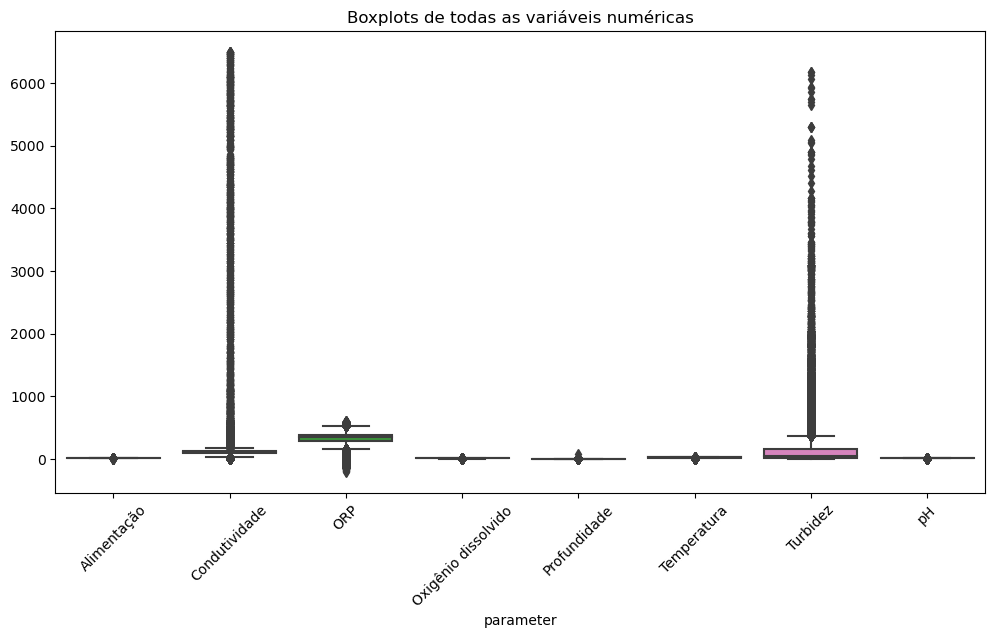

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplots de todas as variáveis numéricas")
plt.xticks(rotation=45)
plt.show()

# Visualização da distribuição dos dados

StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 23, Finished, Available, Finished)

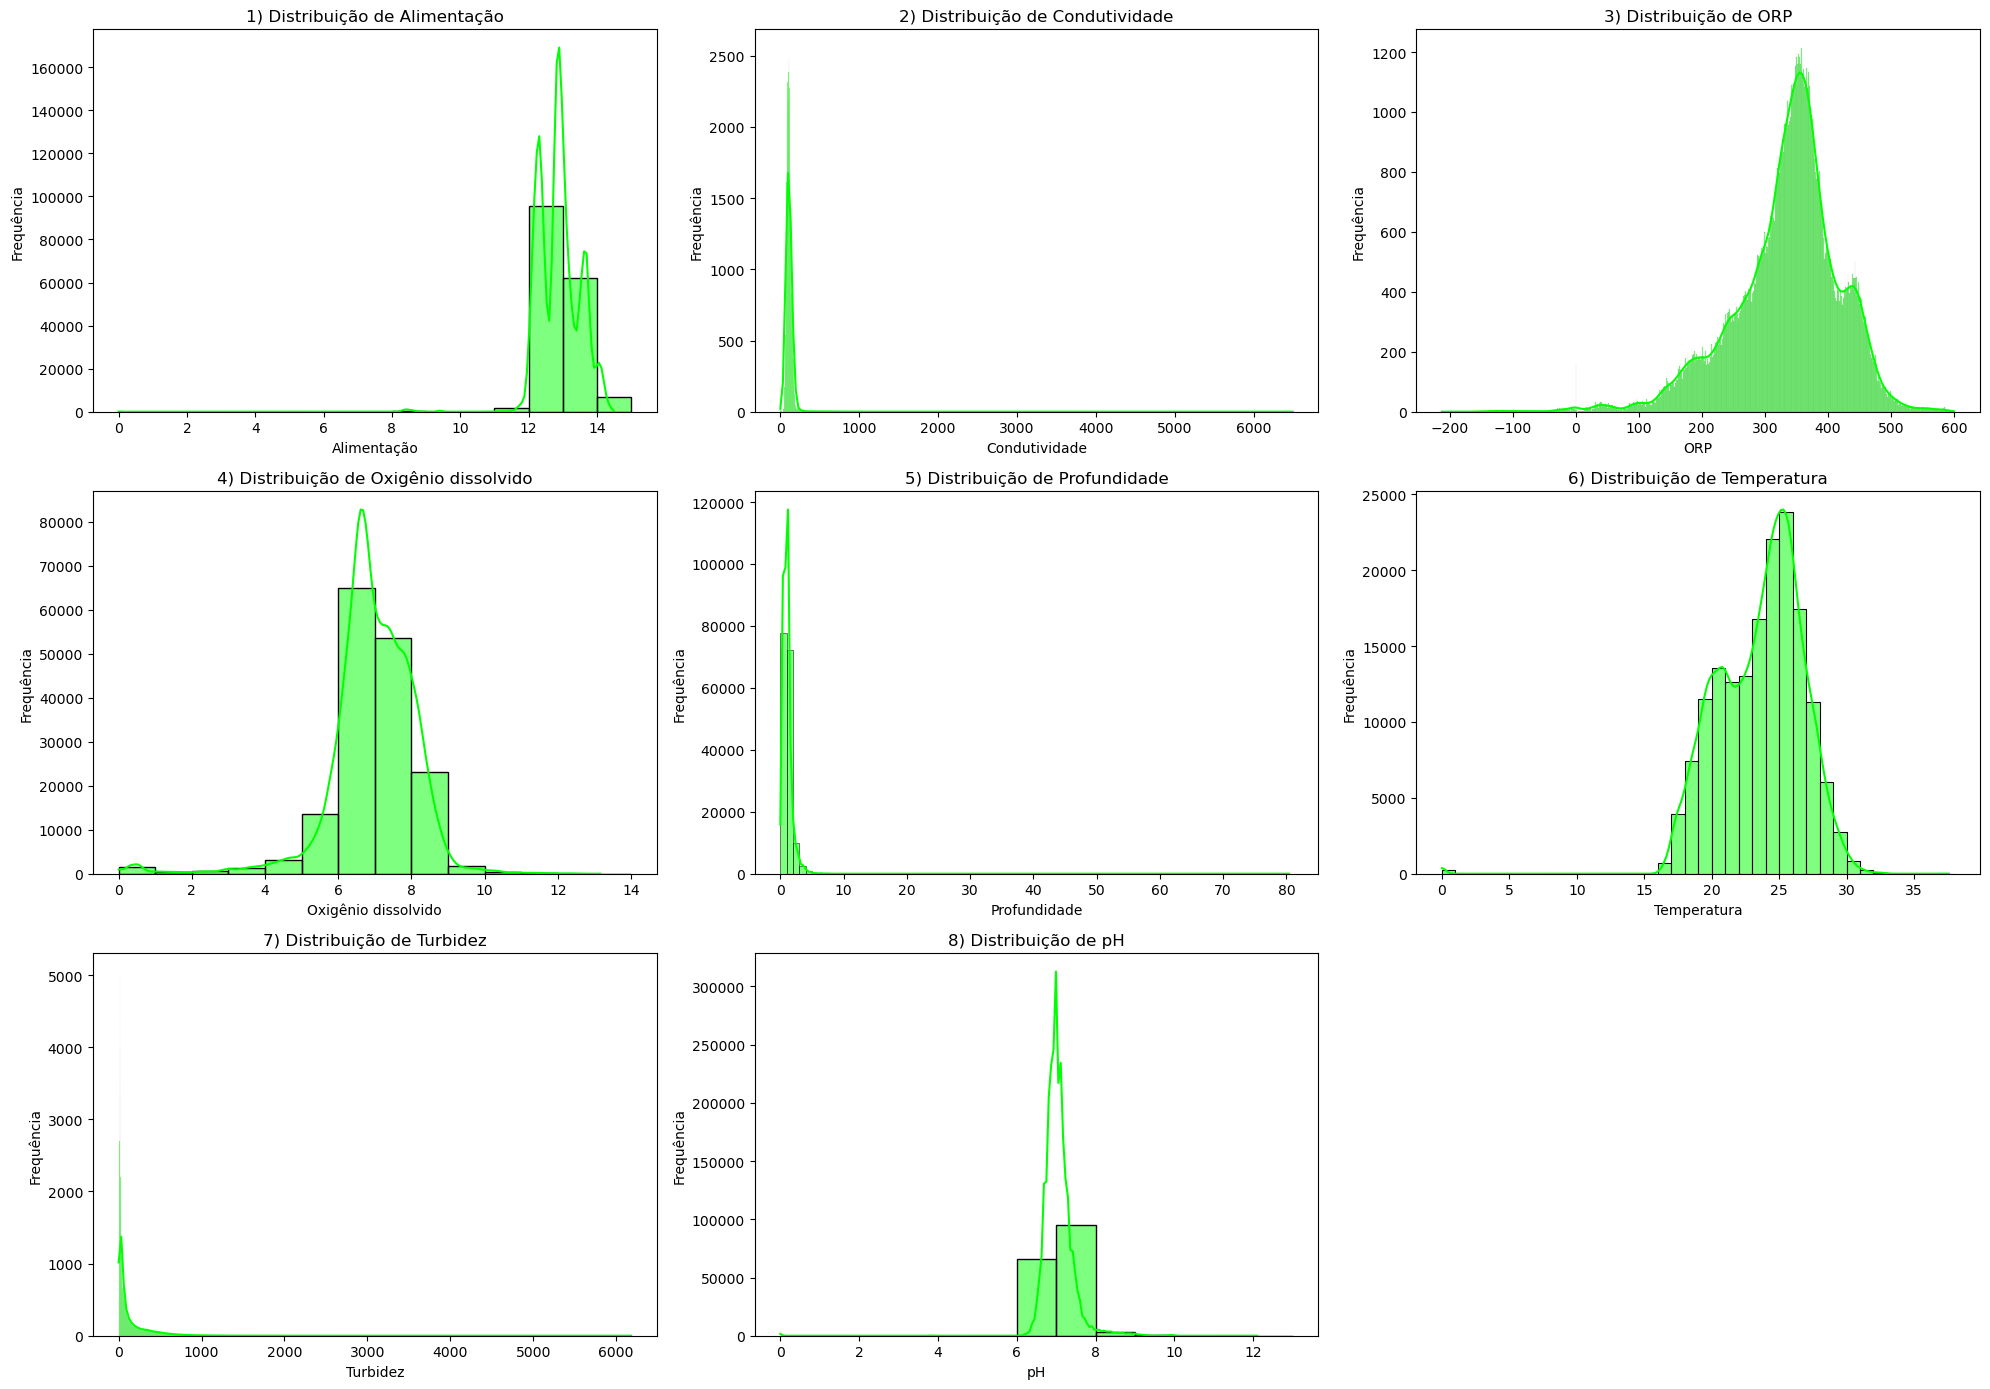

In [21]:
# Lista de colunas numéricas que você quer plotar
num_cols = ['Alimentação','Condutividade','ORP','Oxigênio dissolvido',
            'Profundidade','Temperatura','Turbidez','pH']

# Configuração da figura
plt.figure(figsize=(20,14))

# Loop para criar os subplots
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # 3 linhas x 3 colunas
    sns.histplot(df[col], binwidth=1, kde=True, color="lime")
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.title(f"{i}) Distribuição de {col}")

plt.tight_layout()
plt.show()


StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 24, Finished, Available, Finished)

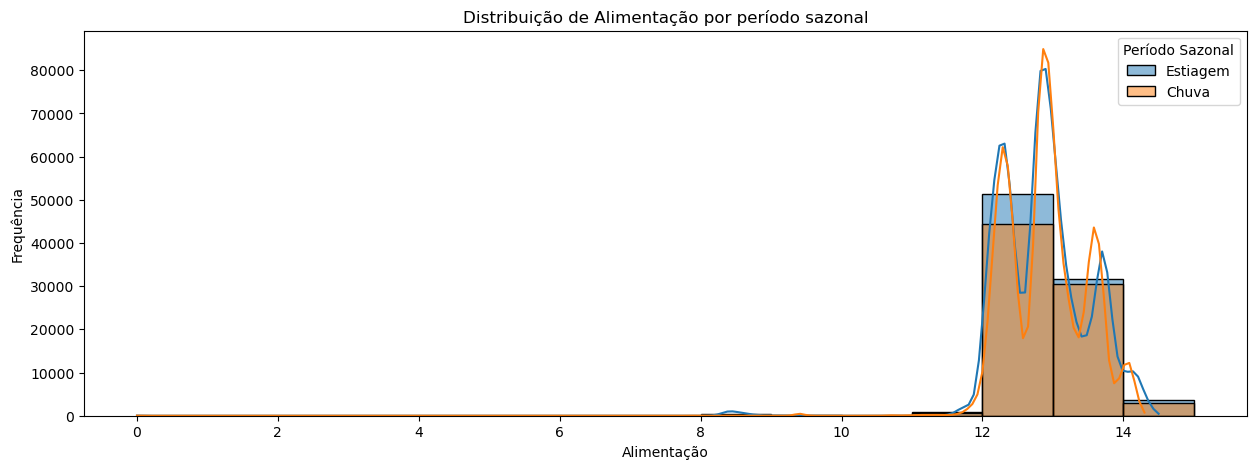

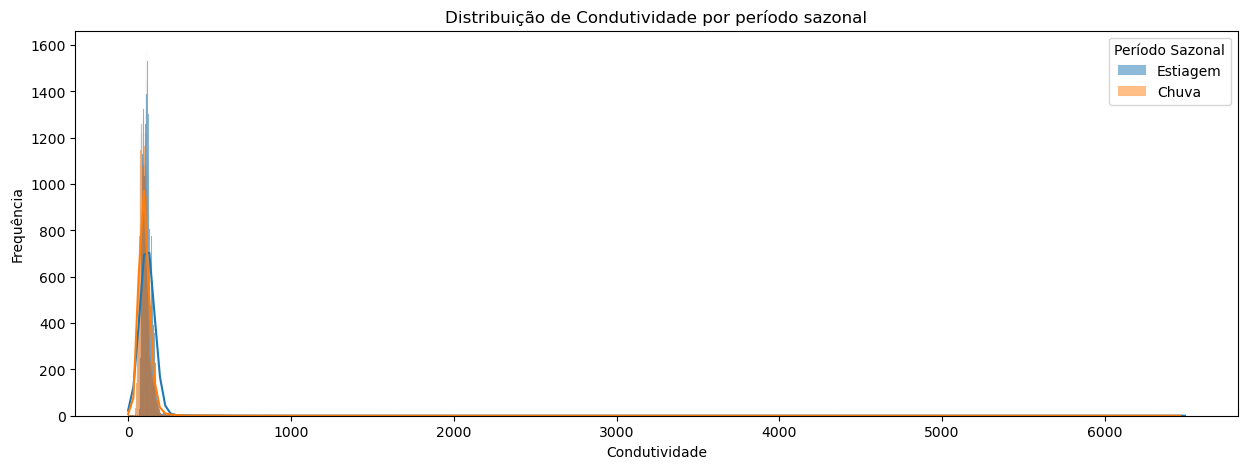

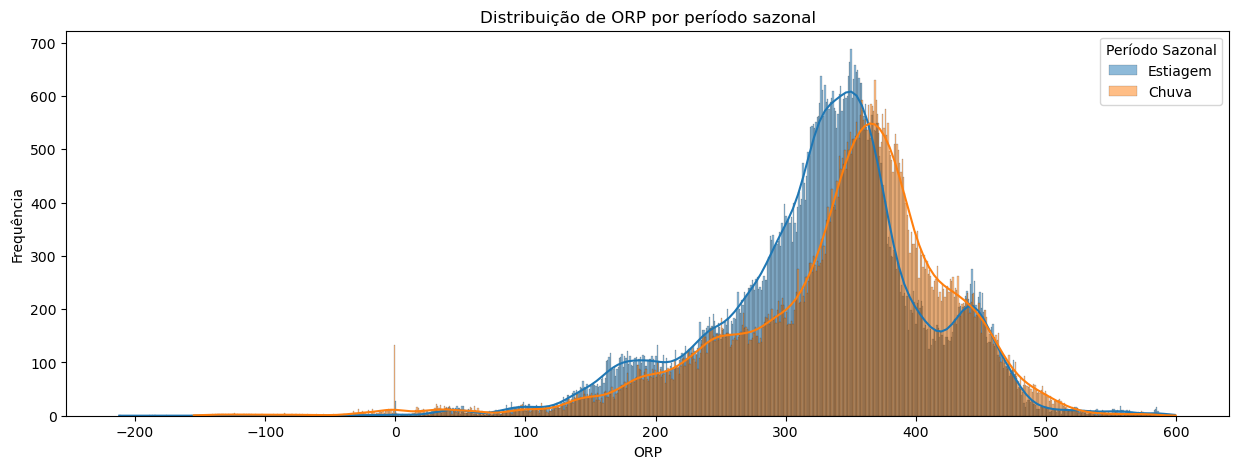

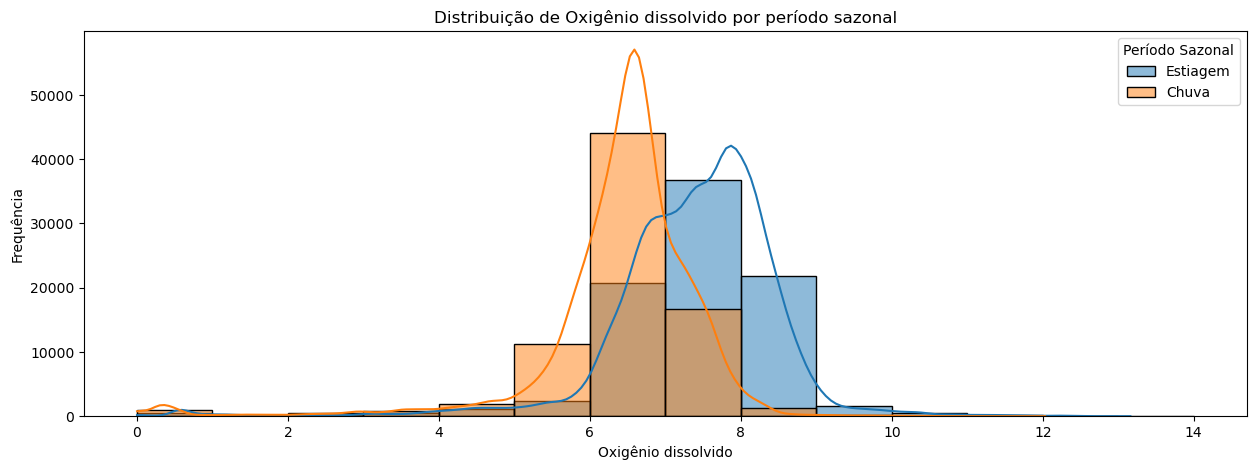

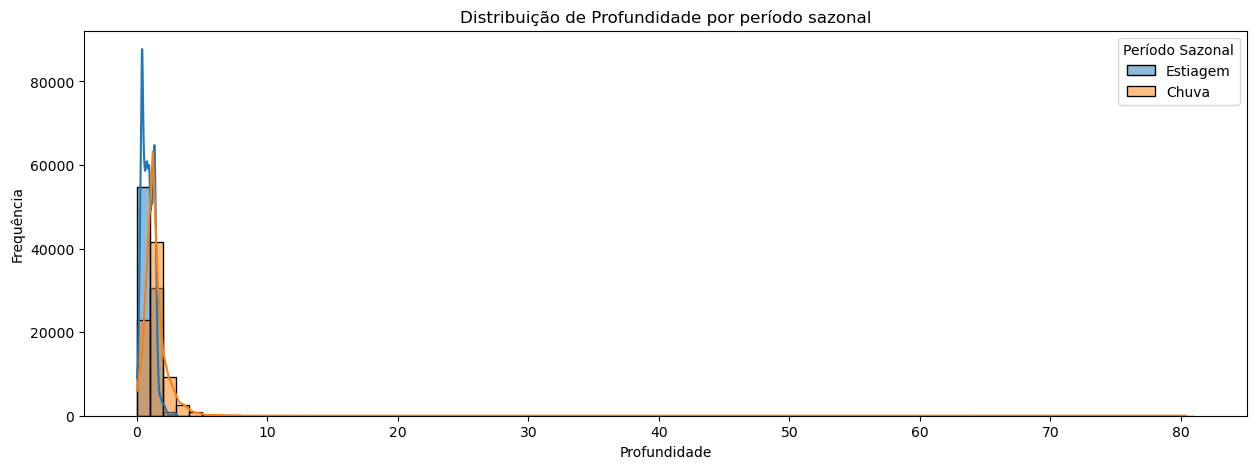

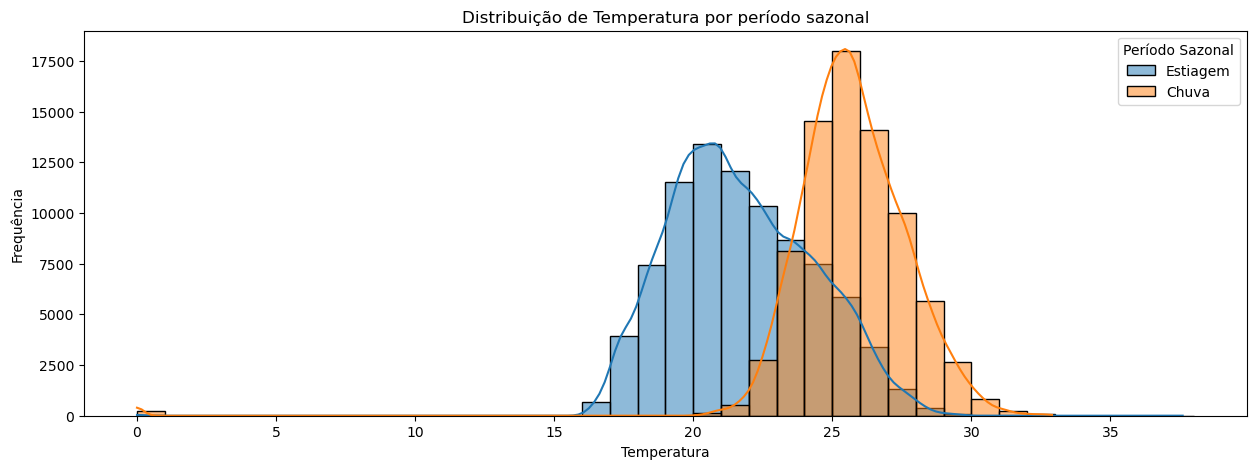

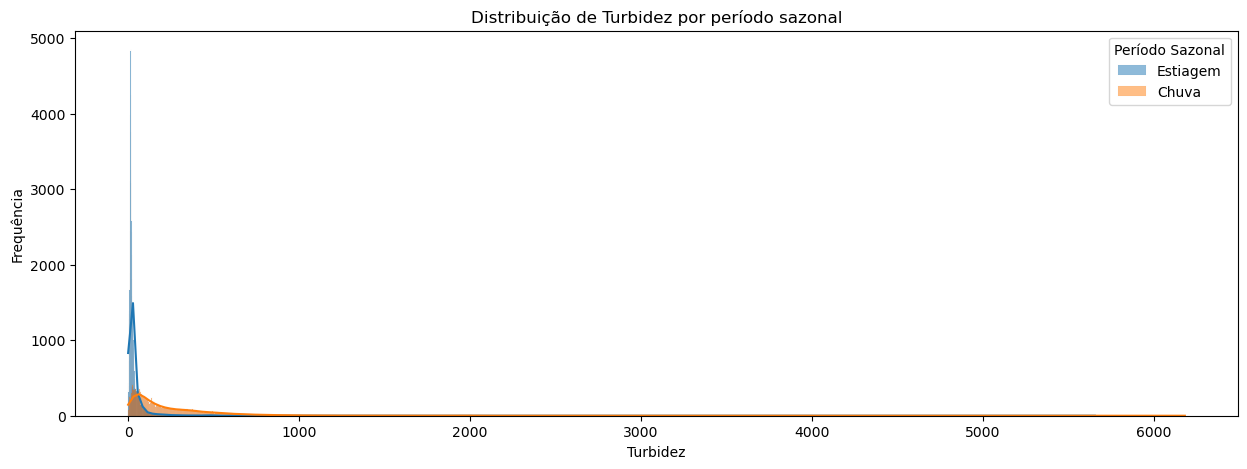

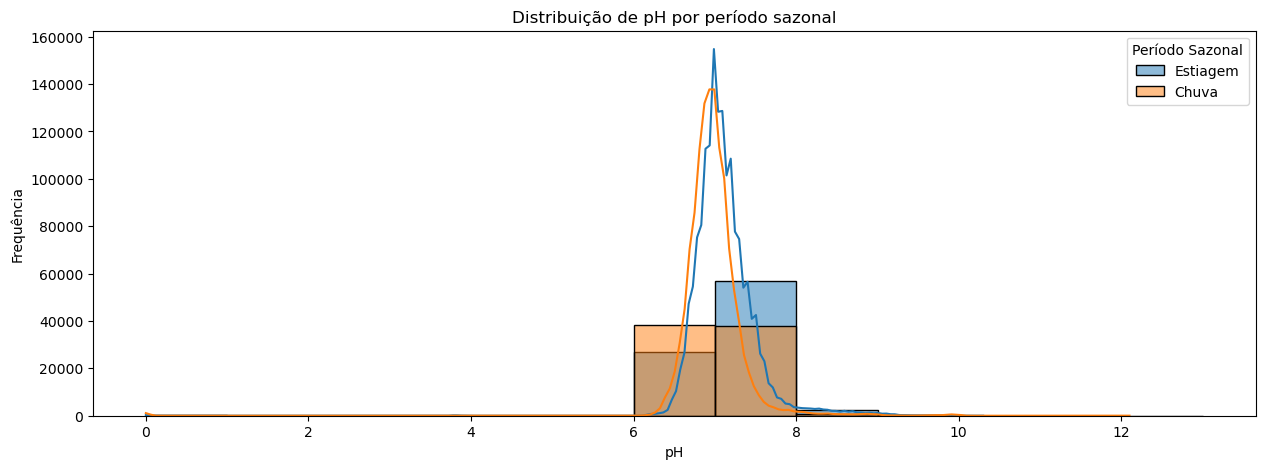

In [22]:
periods = df['periodo_sazonal'].unique()
num_cols = ['Alimentação','Condutividade','ORP','Oxigênio dissolvido',
            'Profundidade','Temperatura','Turbidez','pH']

for col in num_cols:
    plt.figure(figsize=(15,5))
    for period in periods:
        sns.histplot(
            df[df['periodo_sazonal']==period][col],
            binwidth=1,
            kde=True,
            label=period,
            alpha=0.5
        )
    plt.title(f"Distribuição de {col} por período sazonal")
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.legend(title='Período Sazonal')
    plt.show()


StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 25, Finished, Available, Finished)

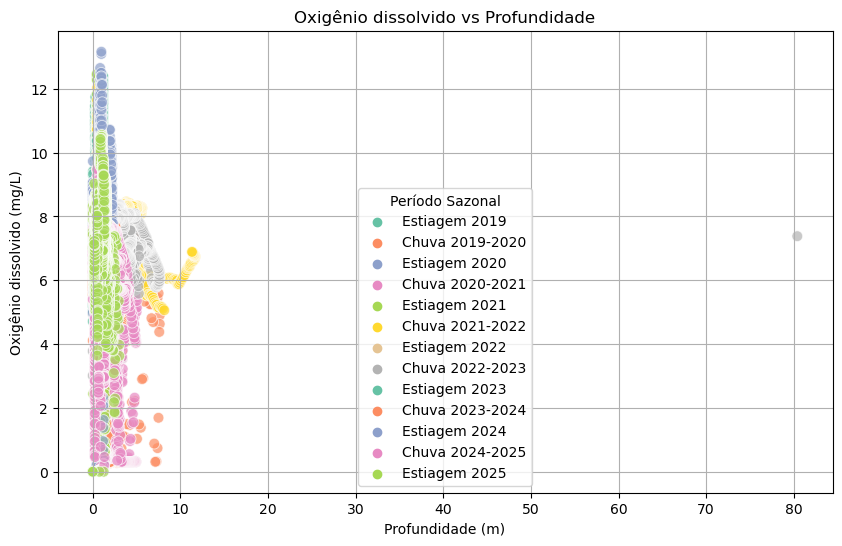

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Profundidade',
    y='Oxigênio dissolvido',
    hue='periodo_sazonal_ano',  # opcional: separa por período sazonal com cores
    palette='Set2',
    s=60,                    # tamanho dos pontos
    alpha=0.7                # transparência
)

plt.title('Oxigênio dissolvido vs Profundidade')
plt.xlabel('Profundidade (m)')
plt.ylabel('Oxigênio dissolvido (mg/L)')
plt.legend(title='Período Sazonal')
plt.grid(True)
plt.show()


StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 26, Finished, Available, Finished)

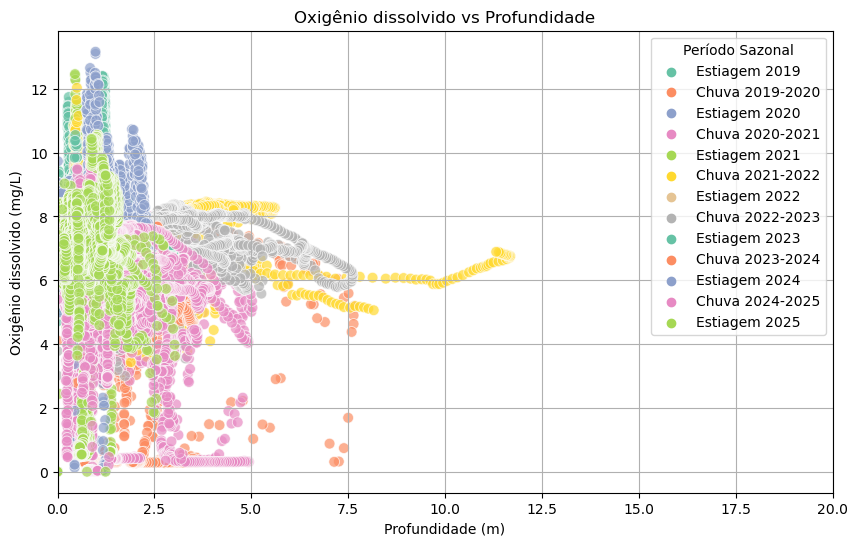

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Profundidade',
    y='Oxigênio dissolvido',
    hue='periodo_sazonal_ano',
    palette='Set2',
    s=60,
    alpha=0.7
)

plt.title('Oxigênio dissolvido vs Profundidade')
plt.xlabel('Profundidade (m)')
plt.ylabel('Oxigênio dissolvido (mg/L)')
plt.legend(title='Período Sazonal')
plt.grid(True)

# Define o limite máximo do eixo x
plt.xlim(0, 20)  # eixo x vai de 0 até 20

plt.show()




StatementMeta(, 2a603669-ca17-470b-98d6-f881a2f58f2a, 27, Finished, Available, Finished)

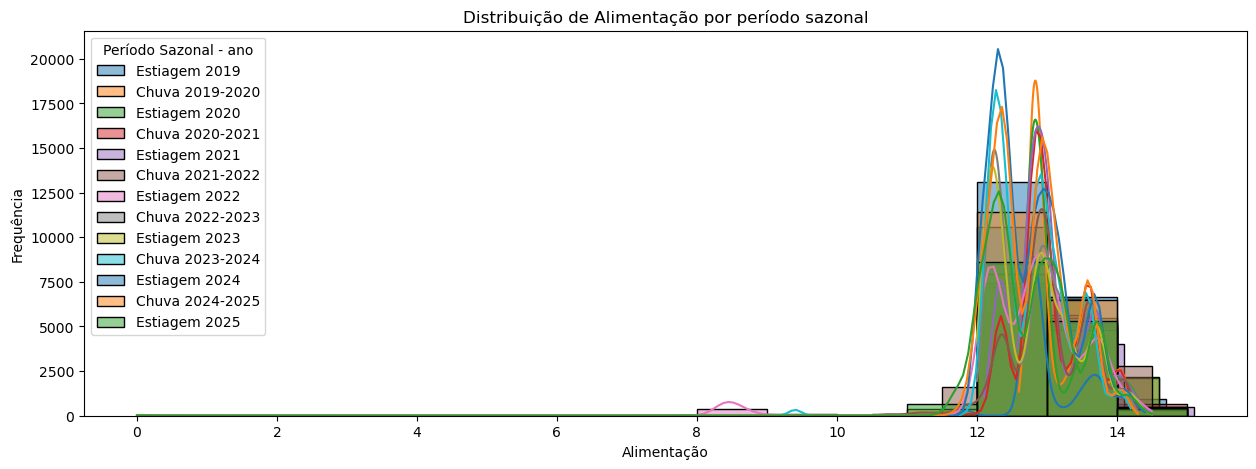

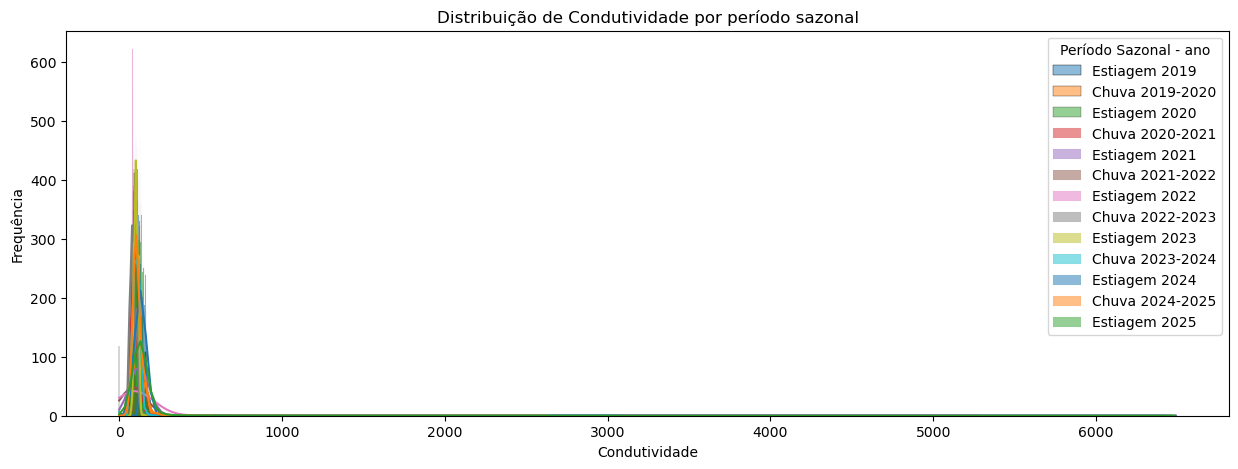

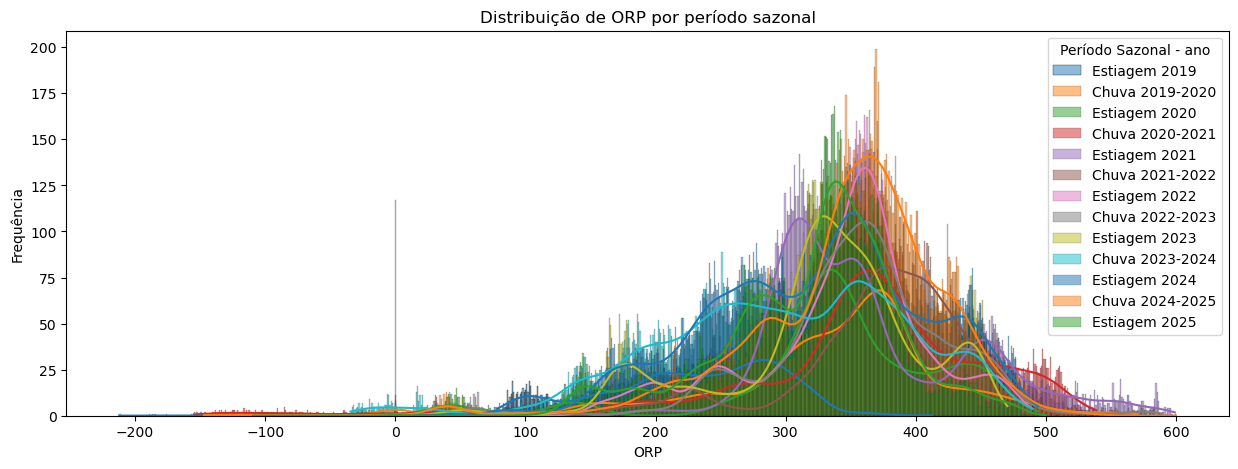

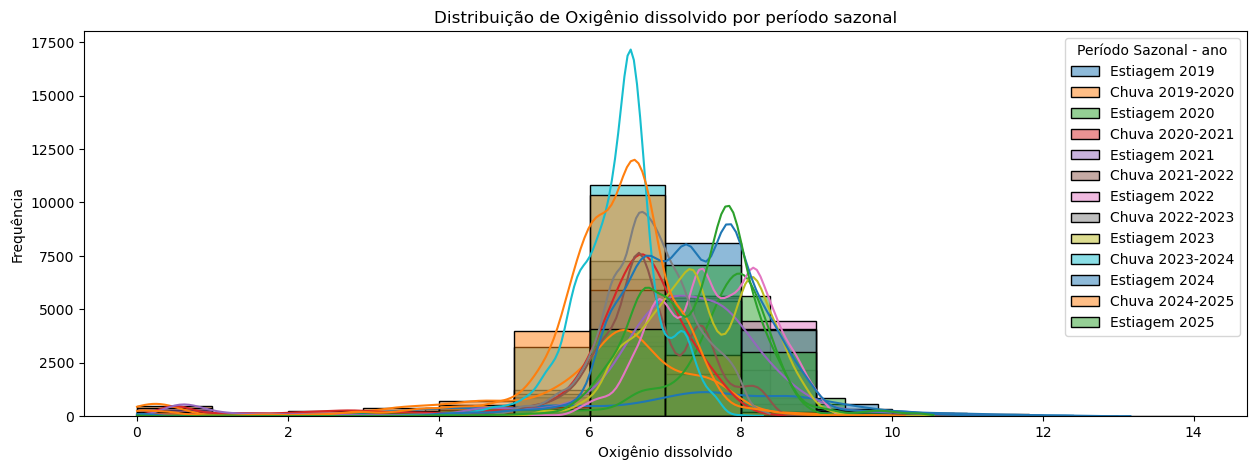

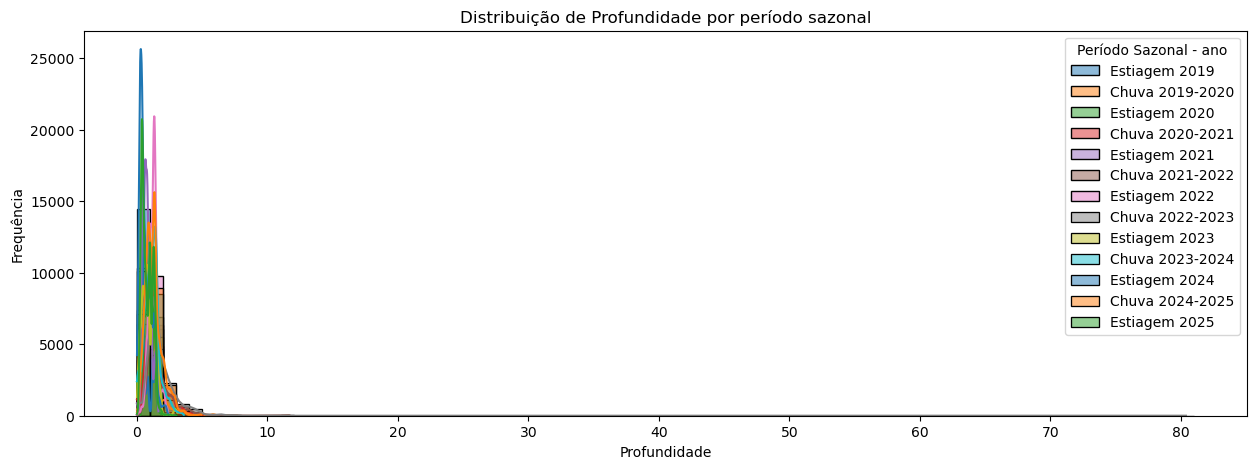

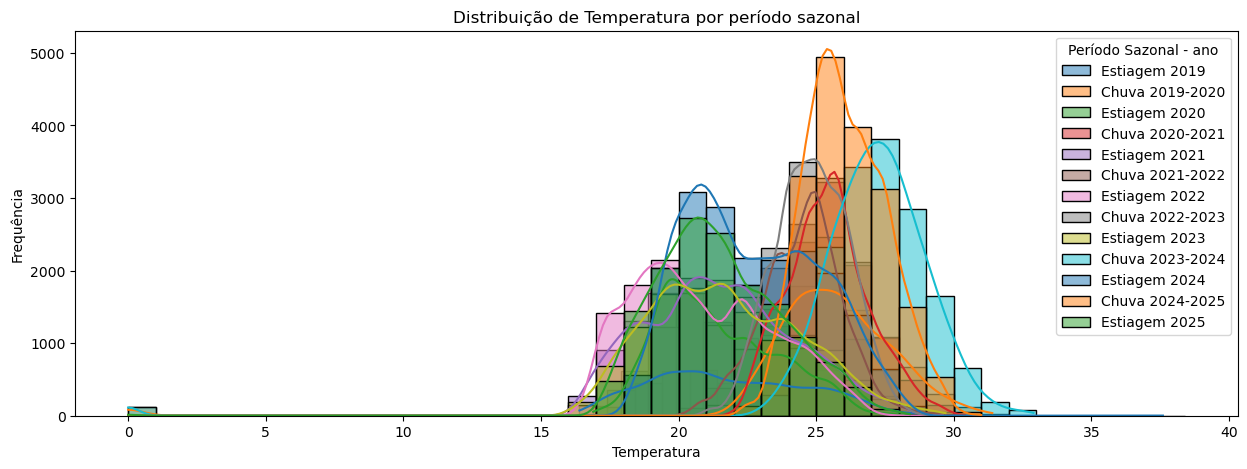

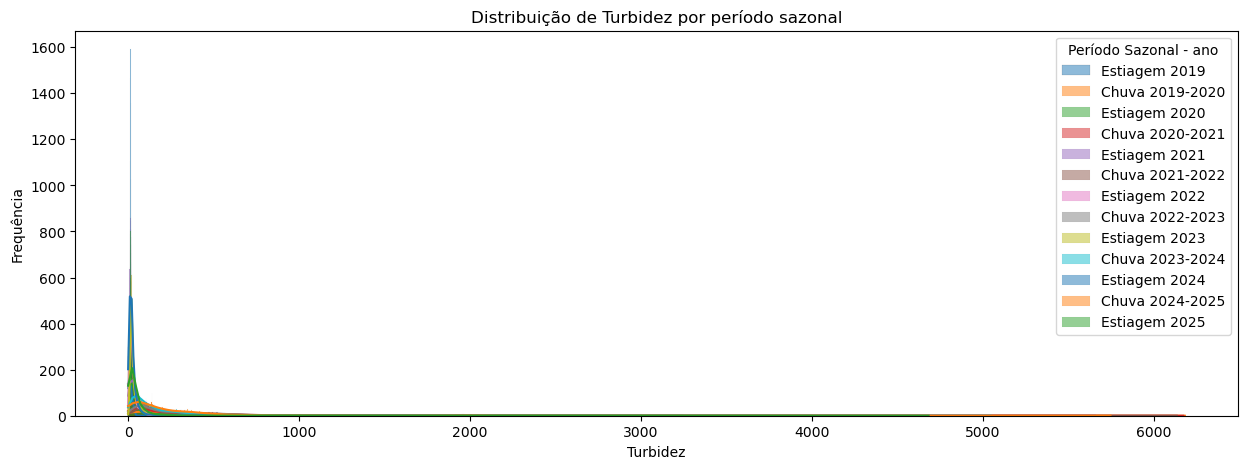

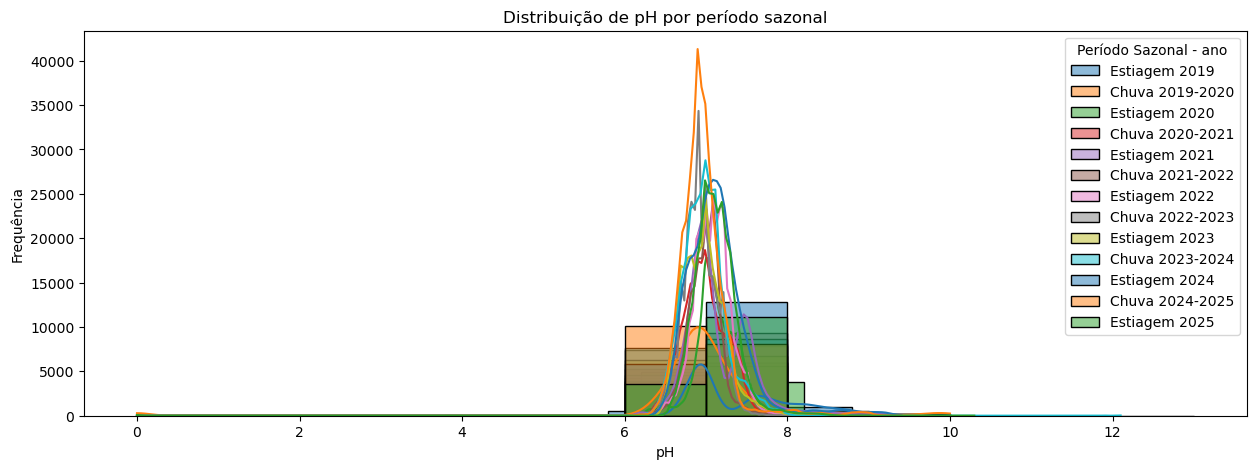

In [25]:
periods = df['periodo_sazonal_ano'].unique()
num_cols = ['Alimentação','Condutividade','ORP','Oxigênio dissolvido',
            'Profundidade','Temperatura','Turbidez','pH']

for col in num_cols:
    plt.figure(figsize=(15,5))
    for period in periods:
        sns.histplot(
            df[df['periodo_sazonal_ano']==period][col],
            binwidth=1,
            kde=True,
            label=period,
            alpha=0.5
        )
    plt.title(f"Distribuição de {col} por período sazonal")
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.legend(title='Período Sazonal - ano')
    plt.show()

# Insights sobre os visuais
- Dispersao entre profundidade e OD
- Alimentação: taxa de entrada de nutrientes para o sistema de monitoramento - maior na chuva.
- Puxar dados de Ferro e Manganês (outros parâmetros tbm).
- Continuar investigando com os dados do banco no Lake e rodar análises dentro do notebook



# Inclusão dos metais

In [2]:
# dt_result
df2 = spark.read.table("dt_resultb")
df2.show(5)

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 4, Finished, Available, Finished)

+--------+--------+-----------+-------------------+--------------------+-----------+--------------+--------+--------------+
| test_id|loc_name|sample_date|chemical_name_final|result_numeric_final|result_unit|lab_qualifiers|fraction|       loc_tel|
+--------+--------+-----------+-------------------+--------------------+-----------+--------------+--------+--------------+
|27103039|   PT-19| 2024-11-16|     Alumínio Total|                3.42|       mg/l|            AD|       T|AUT-MRB01-PT19|
|27103039|   PT-19| 2024-11-16|        Ferro Total|                4.53|       mg/l|            AD|       T|AUT-MRB01-PT19|
|27103039|   PT-19| 2024-11-16|     Manganês Total|                0.27|       mg/l|            AD|       T|AUT-MRB01-PT19|
|27117332|   PT-18| 2024-11-16|     Alumínio Total|                2.68|       mg/l|            AD|       T|    AUT-MPT-P7|
|27117332|   PT-18| 2024-11-16|        Ferro Total|                3.55|       mg/l|            AD|       T|    AUT-MPT-P7|
+-------

In [5]:
# telemétricas - sondas_clean
df = spark.read.table("dt_sondas_clean_completa")

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 7, Finished, Available, Finished)

In [6]:
# lista dos loc_name desejados
locs_desejados = ["AUT-MG050", "AUT-CPM_Ativa", "AUT-MPT-P7", "AUT-MRB01-PT19"]

# filtrando
df = df[df["loc_name"].isin(locs_desejados)]

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 8, Finished, Available, Finished)

In [9]:
from pyspark.sql import functions as F
# Fazer o pivot diretamente no Spark
df = (
    df.groupBy("sample_date", "loc_name")  # as colunas que serão o índice
      .pivot("parameter")                  # coluna que vira colunas
      .agg(F.first("value"))               # o valor que preenche as células
)

# Mostrar as primeiras linhas
display(df)

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 11, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, da3259f0-0ef2-4a91-8f76-5cb0f683d180)

In [11]:
df.select("loc_name").distinct().show()
df2.select("loc_tel").distinct().show()

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 13, Finished, Available, Finished)

+--------------+
|      loc_name|
+--------------+
| AUT-CPM_Ativa|
|    AUT-MPT-P7|
|     AUT-MG050|
|AUT-MRB01-PT19|
+--------------+

+--------------+
|       loc_tel|
+--------------+
| AUT-CPM_Ativa|
|    AUT-MPT-P7|
|     AUT-MG050|
|AUT-MRB01-PT19|
+--------------+



## Transpor as planilhas dos metais

In [12]:
# Fazer o pivot diretamente no Spark
df2 = (
    df2.groupBy("sample_date", "loc_name", "loc_tel")  # as colunas que serão o índice
      .pivot("chemical_name_final")                  # coluna que vira colunas
      .agg(F.first("result_numeric_final"))               # o valor que preenche as células
)

# Mostrar as primeiras linhas
# Mostrar a tabela inteira
display(df2)


StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 14, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, a2eb40e3-538d-4d34-9013-417495effad5)

In [13]:
df.select("loc_name").distinct().show()
df2.select("loc_tel").distinct().show()

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 15, Finished, Available, Finished)

+--------------+
|      loc_name|
+--------------+
| AUT-CPM_Ativa|
|    AUT-MPT-P7|
|     AUT-MG050|
|AUT-MRB01-PT19|
+--------------+

+--------------+
|       loc_tel|
+--------------+
| AUT-CPM_Ativa|
|    AUT-MPT-P7|
|     AUT-MG050|
|AUT-MRB01-PT19|
+--------------+



In [16]:
from pyspark.sql.functions import col, trim, upper
# Criar cópias dos DataFrames
df_sel = df
df2_sel = df2

# Limpar e padronizar strings
df_sel = df_sel.withColumn("loc_name", upper(trim(col("loc_name"))))
df2_sel = df2_sel.withColumn("loc_tel", upper(trim(col("loc_tel"))))

# Garantir que sample_date seja do mesmo tipo
df_sel = df_sel.withColumn("sample_date", col("sample_date").cast("date"))
df2_sel = df2_sel.withColumn("sample_date", col("sample_date").cast("date"))

# Fazer o join pelo sample_date e loc_name = loc_tel
df3 = df_sel.join(
    df2_sel,
    (df_sel.sample_date == df2_sel.sample_date) & (df_sel.loc_name == df2_sel.loc_tel),
    how="outer"  # Mantém todas as linhas de ambos os DataFrames
).select(
    df_sel["*"],          # todas as colunas do primeiro DataFrame
    df2_sel["Alumínio Total"]  # coluna específica do segundo
)

# Visualizar as primeiras 10 linhas
display(df3)



StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 18, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 48a7e12b-de26-4bee-8dfa-e4d9c9ad335e)

In [17]:
df3.select("loc_name").distinct().show()
#df3.select("loc_tel").distinct().show()

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 19, Finished, Available, Finished)

+--------------+
|      loc_name|
+--------------+
|          null|
| AUT-CPM_ATIVA|
|    AUT-MPT-P7|
|     AUT-MG050|
|AUT-MRB01-PT19|
+--------------+



# Descriptive Statistics

In [19]:
df1 = df3

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 21, Finished, Available, Finished)

In [20]:
from pyspark.sql.types import DoubleType, IntegerType, StringType, DateType

# Listar colunas numéricas (int ou double)
num_attributes = [c for c, t in df1.dtypes if t in ('int', 'bigint', 'double', 'float')]

# Listar colunas categóricas (string, date etc.)
cat_attributes = [c for c, t in df1.dtypes if t not in ('int', 'bigint', 'double', 'float', 'date')]

print("Colunas numéricas:", num_attributes)
print("Colunas categóricas:", cat_attributes)

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 22, Finished, Available, Finished)

Colunas numéricas: ['null', '', 'Alimentação', 'Condutividade', 'Nível', 'ORP', 'Oxigênio dissolvido', 'Profundidade', 'Temperatura', 'Temperatura do Ar', 'Turbidez', 'Umidade do ar', 'pH', 'Alumínio Total']
Colunas categóricas: ['loc_name']


In [21]:
# Converter a coluna 'date' para tipo date
df1 = df1.withColumn("sample_date", col("sample_date").cast(DateType()))

# Checar tipos das colunas
df1.printSchema()

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 23, Finished, Available, Finished)

root
 |-- sample_date: date (nullable = true)
 |-- loc_name: string (nullable = true)
 |-- null: double (nullable = true)
 |-- : double (nullable = true)
 |-- Alimentação: double (nullable = true)
 |-- Condutividade: double (nullable = true)
 |-- Nível: double (nullable = true)
 |-- ORP: double (nullable = true)
 |-- Oxigênio dissolvido: double (nullable = true)
 |-- Profundidade: double (nullable = true)
 |-- Temperatura: double (nullable = true)
 |-- Temperatura do Ar: double (nullable = true)
 |-- Turbidez: double (nullable = true)
 |-- Umidade do ar: double (nullable = true)
 |-- pH: double (nullable = true)
 |-- Alumínio Total: double (nullable = true)



In [22]:
from pyspark.sql.functions import col, sum, when

# Contar nulos por coluna
na_count_df = df1.select([
    sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df1.columns
])

# Converter para Pandas para análise fácil
na_summary = na_count_df.toPandas().T.reset_index()
na_summary.columns = ["column", "na_count"]

# Calcular percentual de NAs
na_summary["na_percent"] = (na_summary["na_count"] / df1.count()) * 100

# Ordenar pelo número de NAs
na_summary = na_summary.sort_values(by="na_count", ascending=False)
na_summary

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 24, Finished, Available, Finished)

,column,na_count,na_percent
3,,144615,85.951941
2,null,120514,71.627509
11,Temperatura do Ar,116148,69.032576
13,Umidade do ar,116050,68.974330
15,Alumínio Total,54494,32.388515
6,Nível,48245,28.674421
5,Condutividade,4826,2.868334
9,Profundidade,4409,2.620490
7,ORP,4133,2.456449
8,Oxigênio dissolvido,3863,2.295974


In [23]:
df1 = df1.withColumnRenamed("null", "Coluna1") \
         .withColumnRenamed(" ", "Coluna2")

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 25, Finished, Available, Finished)

In [24]:
from pyspark.sql.functions import mean, stddev, min, max, skewness, kurtosis, col

num_attributes = [c for c, t in df1.dtypes if t in ('int', 'bigint', 'double', 'float')]

rows = []
for c in num_attributes:
    # Estatísticas básicas
    stats = df1.select(
        min(c).alias("min"),
        max(c).alias("max"),
        (max(c) - min(c)).alias("range"),
        mean(c).alias("mean"),
        stddev(c).alias("std"),
        skewness(c).alias("skew"),
        kurtosis(c).alias("kurtosis")
    ).collect()[0]
    
    # Mediana (usando approxQuantile)
    median = df1.approxQuantile(c, [0.5], 0.01)[0]
    
    # Adicionar linha
    rows.append((c, stats['min'], stats['max'], stats['range'], stats['mean'], median, stats['std'], stats['skew'], stats['kurtosis']))

# Transformar em DataFrame Pandas para visualização
import pandas as pd
m = pd.DataFrame(rows, columns=['attributes','min','max','range','mean','median','std','skew','kurtosis'])
m


StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 26, Finished, Available, Finished)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,Coluna1,0.00,2.586499e+06,2.586499e+06,70972.567203,19.7154,412349.620378,5.764513,31.677799
1,,0.00,1.514352e+06,1.514352e+06,25345.467064,34.1332,193445.479330,7.530214,54.746499
2,Alimentação,0.00,1.450000e+01,1.450000e+01,12.878609,12.9000,0.612757,-1.354376,19.651465
3,Condutividade,0.00,6.490800e+03,6.490800e+03,130.114214,106.9000,291.912183,16.336809,286.271693
4,Nível,0.00,6.553500e+02,6.553500e+02,1.620952,0.8500,19.048763,34.054317,1164.524220
5,ORP,-212.20,5.999000e+02,8.121000e+02,334.855313,345.7000,84.916417,-0.873428,1.971695
6,Oxigênio dissolvido,0.00,1.316000e+01,1.316000e+01,6.932465,6.9400,1.215307,-1.695118,7.904155
7,Profundidade,0.00,8.040000e+01,8.040000e+01,1.110204,1.0500,0.758235,9.208459,742.960202
8,Temperatura,0.00,3.760000e+01,3.760000e+01,23.606472,24.0000,3.145644,-0.821142,4.027585
9,Temperatura do Ar,-52.15,9.796000e+01,1.501100e+02,11.828384,20.6100,22.311546,-1.607036,1.242931


Panorama geral:
- A maioria das variáveis tem distribuições altamente assimétricas (skew) e curtose muito alta, o que indica distribuições não normais (muitos outliers ou caudas longas).
- Isso é muito importante, pois afeta diretamente modelos baseados em distância (como k-NN, SVM) e regressões lineares.

Problemas:
| Variável      | Skew  | Curtose | Observação                                                                                                            |
| ------------- | ----- | ------- | --------------------------------------------------------------------------------------------------------------------- |
| Condutividade | 16.33 | 286.27  | Distribuição extremamente assimétrica — valores muito altos comparados à média. Deve ser normalizada ou transformada. |
| Nível         | 34.05 | 1164.52 | Provável erro de medição ou muitos zeros e poucos valores altos. Necessário revisar ou aplicar `log1p()`.             |
| Profundidade  | 9.21  | 742.96  | Mesma situação, pode haver valores extremos ou registros errados.                                                     |
| Turbidez      | 5.79  | 65.66   | Outliers relevantes — pode distorcer modelos lineares.                                                                |
| pH            | -3.31 | 84.38   | Curtose alta e skew negativo — distribuição muito concentrada e com valores mínimos atípicos.                         |

Variáveis com escalas muito diferentes
- Condutividade e Turbidez têm valores na casa dos milhares.

pH, Oxigênio dissolvido, Temperatura estão na escala baixa (0–14, 0–40).

➡️ Normalização ou padronização é obrigatória antes de treinar o modelo, especialmente se for usar:
Regressão logística/linear,
SVM,
kNN,
Redes neurais.
Use:
StandardScaler (z-score) → mantém médias e desvios padrão.
MinMaxScaler (0–1) → útil se você quiser preservar limites.


In [30]:
df1 = df1.na.drop(how="all")

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 32, Finished, Available, Finished)

In [26]:
df1 = df1.drop("Coluna1", "", "Alimentação", "Temperatura do Ar", "Umidade do ar")

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 28, Finished, Available, Finished)

In [27]:
df1 = df1.na.drop(subset=["Alumínio Total"])

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 29, Finished, Available, Finished)

In [28]:
from pyspark.sql import functions as F

median_turbidez = df1.approxQuantile("Turbidez", [0.5], 0.01)[0]
df1 = df1.fillna({"Turbidez": median_turbidez})

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 30, Finished, Available, Finished)

In [31]:
df1 = df1.na.drop(subset=["Turbidez"])

from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=["Turbidez"],
    outputCol="features"
)

df_nn = assembler.transform(df1).select("features", "Alumínio Total")

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 33, Finished, Available, Finished)

In [32]:
df_pd = df1.select("Turbidez", "Alumínio Total").dropna().toPandas()

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 34, Finished, Available, Finished)

In [33]:
X = df_pd[["Turbidez"]].values
y = df_pd["Alumínio Total"].values

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 35, Finished, Available, Finished)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(10, input_dim=1, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1)  # saída contínua
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=32)

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 36, Finished, Available, Finished)

Epoch 1/50
3555/3555 [==============================] - 6s 1ms/step - loss: 157.3019
Epoch 2/50
3555/3555 [==============================] - 3s 845us/step - loss: 10.5406
Epoch 3/50
3555/3555 [==============================] - 3s 854us/step - loss: 10.5673
Epoch 4/50
3555/3555 [==============================] - 3s 847us/step - loss: 10.5053
Epoch 5/50
3555/3555 [==============================] - 3s 854us/step - loss: 10.3086
Epoch 6/50
3555/3555 [==============================] - 4s 1ms/step - loss: 9.2968
Epoch 7/50
3555/3555 [==============================] - 3s 842us/step - loss: 7.8172

INFO:tensorflow:Assets written to: /tmp/tmpp36soa9u/model/data/model/assets


In [35]:
# Avaliar o desempenho no próprio conjunto de treino
loss = model.evaluate(X, y)
print(f"Erro quadrático médio: {loss}")


StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 37, Finished, Available, Finished)

3555/3555 [==============================] - 2s 653us/step - loss: 6.8480
Erro quadrático médio: 6.848031520843506


In [36]:
y_pred = model.predict(X)

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 38, Finished, Available, Finished)

3555/3555 [==============================] - 2s 599us/step


StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 39, Finished, Available, Finished)

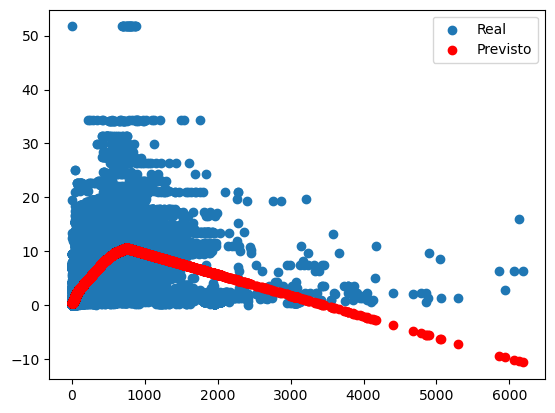

In [37]:
import matplotlib.pyplot as plt

plt.scatter(X, y, label="Real")
plt.scatter(X, y_pred, label="Previsto", color='red')
plt.legend()
plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler

# 1️⃣ Renomear coluna no DataFrame Spark
df1 = df1.withColumnRenamed("Alumínio Total", "Aluminio_total")

# 2️⃣ Converter para Pandas (agora sim dá pra usar métodos do Pandas)
df_pd = df1.toPandas()

# 3️⃣ Selecionar colunas de interesse
X = df_pd[['Turbidez']].values
y = df_pd[['Aluminio_total']].values

# 4️⃣ Normalizar para [0,1]
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)


StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 41, Finished, Available, Finished)

StatementMeta(, b417515a-e1af-4e97-b844-ab009c3f1468, 42, Finished, Available, Finished)

Epoch 1/100
5688/5688 [==============================] - 7s 1ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 2/100
5688/5688 [==============================] - 6s 1ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 3/100
5688/5688 [==============================] - 6s 1ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 4/100
5688/5688 [==============================] - 6s 1ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 5/100
5688/5688 [==============================] - 6s 987us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 6/100
5688/5688 [==============================] - 6s 1ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 7/100
5688/5688 [==============================] - 7s 1ms/step - loss: 0.0026 - val_loss: 0.0025

INFO:tensorflow:Assets written to: /tmp/tmp_jnlenmt/model/data/model/assets


711/711 [==============================] - 0s 616us/step
MAE: 1.3182
R²: 0.5037


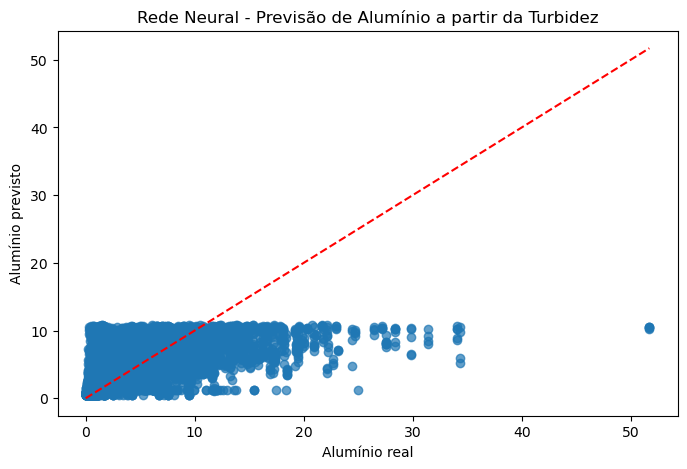

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# 1️⃣ Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# 2️⃣ Criar modelo
model = Sequential([
    Dense(10, input_dim=1, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1)  # saída contínua
])

model.compile(optimizer='adam', loss='mse')

# 3️⃣ Treinar modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 4️⃣ Fazer previsões
y_pred_scaled = model.predict(X_test)

# 5️⃣ Desnormalizar previsões para a escala original
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

# 6️⃣ Avaliar modelo
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# 7️⃣ Visualizar resultados
plt.figure(figsize=(8,5))
plt.scatter(y_test_original, y_pred, alpha=0.7)
plt.xlabel("Alumínio real")
plt.ylabel("Alumínio previsto")
plt.title("Rede Neural - Previsão de Alumínio a partir da Turbidez")
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--')  # linha de referência y=x
plt.show()
